# Retail - Project 3

DESCRIPTION

Problem Statement

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


Context: 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Data Description:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric. 

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.


### Importing Retail Dataset

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)
sns.set(style='white')

In [305]:
df_train=pd.read_excel("train.xlsx")

In [306]:
df_test=pd.read_excel("test.xlsx")

In [17]:
print("Shape of train data")
print("-------------------")
print(df_train.shape,end='\n\n')

print("Columns of train data")
print("---------------------")
print(list(df_train.columns),end='\n\n')

print("Types of train columns",end='\n')
print("----------------------",end='\n')
print(df_train.info())

Shape of train data
-------------------
(379336, 8)

Columns of train data
---------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Types of train columns
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
InvoiceNo      379336 non-null object
StockCode      379336 non-null object
Description    378373 non-null object
Quantity       379336 non-null int64
InvoiceDate    379336 non-null datetime64[ns]
UnitPrice      379336 non-null float64
CustomerID     285076 non-null float64
Country        379336 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB
None


In [18]:
print("Shape of test data")
print("-------------------")
print(df_test.shape,end='\n\n')

print("Columns of test data")
print("---------------------")
print(list(df_test.columns),end='\n\n')

print("Types of test columns",end='\n')
print("----------------------",end='\n')
print(df_test.info())

Shape of test data
-------------------
(162573, 8)

Columns of test data
---------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Types of test columns
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
InvoiceNo      162573 non-null object
StockCode      162573 non-null object
Description    162082 non-null object
Quantity       162573 non-null int64
InvoiceDate    162573 non-null datetime64[ns]
UnitPrice      162573 non-null float64
CustomerID     121753 non-null float64
Country        162573 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB
None


In [20]:
print("Length of train dataset :-",len(df_train))
print("Length of test dataset :-",len(df_test))

Length of train dataset :- 379336
Length of test dataset :- 162573


In [24]:
df_train.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,379336.0,379336,378373,379336.000000,379336,379336.000000,285076.000000,379336
unique,23857.0,4008,4132,NaN,21712,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,774.0,1611,1649,NaN,774,NaN,NaN,346854
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.517272,NaN,4.681474,15288.302463,NaN
std,NaN,NaN,NaN,259.070548,NaN,105.799352,1712.323663,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13958.750000,NaN


In [22]:
df_test.describe()

,Quantity,UnitPrice,CustomerID
count,162573.000000,162573.000000,121753.000000
mean,9.633863,4.446940,15286.257866
std,43.862669,71.344746,1716.591938
min,-3667.000000,-11062.060000,12347.000000
25%,1.000000,1.250000,13940.000000
50%,3.000000,2.080000,15150.000000
75%,10.000000,4.130000,16794.000000
max,3114.000000,13541.330000,18287.000000


In [235]:
df_train.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom


In [236]:
df_test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom


### Check for missing data and formulate an apt strategy to treat them.

In [307]:
# check for missing data in train data
df_train.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [308]:
# check for missing data in test data
df_test.isnull().sum()

InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64

In [314]:
missing_value_train=pd.DataFrame(data=df_train.isnull().sum()/len(df_train)*100,index=df_train.columns,columns=['missing%'])
missing_value_train.sort_values(by='missing%',ascending=False, inplace=True)
missing_value_train[missing_value_train['missing%'] >0]

,missing%
CustomerID,24.848683


In [315]:
missing_value_test=pd.DataFrame(data=df_test.isnull().sum()/len(df_test)*100,index=df_test.columns,columns=['missing%'])
missing_value_test.sort_values(by='missing%',ascending=False, inplace=True)
missing_value_test[missing_value_test['missing%'] >0]

,missing%
CustomerID,25.10872


1. Train data has 25% missing data in customerID and 0.25%in description.
2. Test data has 25% missing data in customerID and 0.30%in description.

Description since, its a discrete value, mode is the correct strategy for treating missing value
Customer ID skewness needs to be checked , for finding the correct strategy for missing values

In [50]:
from scipy.stats import skew
skew(df_train['CustomerID'],nan_policy='omit') 

masked_array(data=0.02977553,
             mask=False,
       fill_value=1e+20)

In [51]:
skew(df_test['CustomerID'],nan_policy='omit')

masked_array(data=0.02998509,
             mask=False,
       fill_value=1e+20)

There are about 130k of missing data in customerID column in train and test. It is better to drop them, since there is no logical way to replace these values

In [316]:
df_train.dropna(subset=['CustomerID'],inplace=True)
df_test.dropna(subset=['CustomerID'],inplace=True)

In [312]:
df_train['Description'].fillna(df_train['Description'].mode()[0],inplace=True)
df_test['Description'].fillna(df_test['Description'].mode()[0],inplace=True)

In [317]:
df_train.isnull().sum().sum()

0

In [318]:
df_test.isnull().sum().sum()

0

In [321]:
df_train.shape,df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285076 entries, 1 to 379335
Data columns (total 8 columns):
InvoiceNo      285076 non-null object
StockCode      285076 non-null object
Description    285076 non-null object
Quantity       285076 non-null int64
InvoiceDate    285076 non-null datetime64[ns]
UnitPrice      285076 non-null float64
CustomerID     285076 non-null float64
Country        285076 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 19.6+ MB


((285076, 8), None)

In [320]:
df_test.shape

(121753, 8)

### Remove duplicate data records.

In [322]:
df_train[df_train.duplicated()]  # 2656 duplicate rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2878,575117,21098,CHRISTMAS TOILET ROLL,1,2011-11-08 14:22:00,1.25,12748.0,United Kingdom
5729,542107,21755,LOVE BUILDING BLOCK WORD,1,2011-01-25 13:38:00,5.95,16222.0,United Kingdom
7615,577778,21733,RED HANGING HEART T-LIGHT HOLDER,1,2011-11-21 16:10:00,2.95,16549.0,United Kingdom
8997,578781,22988,SOLDIERS EGG CUP,1,2011-11-25 11:54:00,1.25,15872.0,United Kingdom
14797,575583,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,1,2011-11-10 11:55:00,2.55,14456.0,United Kingdom
...,...,...,...,...,...,...,...,...
378899,577773,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
379020,571682,23182,TOILET SIGN OCCUPIED OR VACANT,1,2011-10-18 14:00:00,0.83,14179.0,United Kingdom
379073,564729,22208,WOOD STAMP SET THANK YOU,2,2011-08-28 12:44:00,0.83,13137.0,United Kingdom
379205,538368,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,2010-12-12 10:57:00,1.65,15503.0,United Kingdom


In [323]:
df_test[df_test.duplicated()] # 468 duplicate rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
8912,545038,82582,AREA PATROLLED METAL SIGN,1,2011-02-27 10:13:00,2.10,13684.0,United Kingdom
9493,562571,22055,MINI CAKE STAND HANGING STRAWBERY,1,2011-08-07 12:21:00,1.65,13782.0,United Kingdom
14441,546107,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-03-09 12:33:00,2.95,17238.0,United Kingdom
14630,558751,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,1,2011-07-03 11:26:00,0.85,16009.0,United Kingdom
15879,543306,22539,MINI JIGSAW DOLLY GIRL,1,2011-02-07 11:56:00,0.42,16686.0,United Kingdom
...,...,...,...,...,...,...,...,...
161121,552652,22475,SKULL DESIGN TV DINNER TRAY,2,2011-05-10 14:09:00,4.95,14591.0,United Kingdom
161245,572861,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-10-26 12:46:00,1.25,14102.0,United Kingdom
161512,579132,22866,HAND WARMER SCOTTY DOG DESIGN,1,2011-11-28 12:35:00,2.10,15022.0,United Kingdom
162188,577034,51014C,"FEATHER PEN,COAL BLACK",12,2011-11-17 13:16:00,0.39,12847.0,United Kingdom


In [324]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [325]:
df_train[df_train.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [326]:
df_test[df_test.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Perform descriptive analytics on the given data.

In [245]:
df_train.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

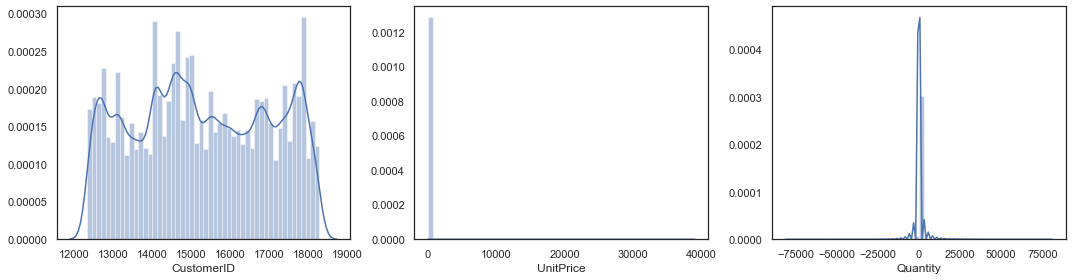

In [327]:
#Visually explore these variables using histograms. 
numeric_cols=df_train.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15,4))
ax1=plt.subplot(131)
sns.distplot(df_train['CustomerID'],ax=ax1)
ax2=plt.subplot(132)
sns.distplot(df_train['UnitPrice'],ax=ax2)
ax3=plt.subplot(133)
sns.distplot(df_train['Quantity'],ax=ax3)
plt.tight_layout()
plt.show()

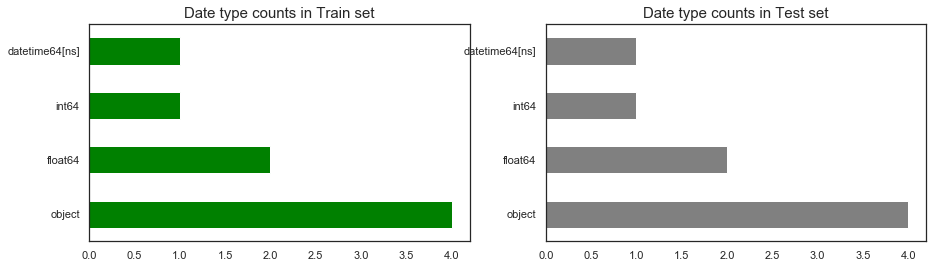

In [328]:
plt.figure(figsize=(15,4))
plt.subplot(121)
df_train.dtypes.value_counts().plot(kind='barh',color='green')
plt.title("Date type counts in Train set",fontsize=15)
plt.subplot(122)
df_test.dtypes.value_counts().plot(kind='barh',color='grey')
plt.title("Date type counts in Test set",fontsize=15)
plt.show()

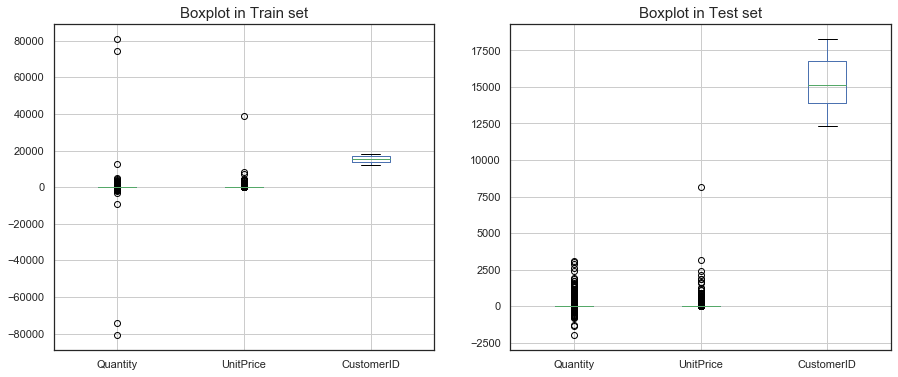

In [329]:
plt.figure(figsize=(15,6))
plt.subplot(121)
df_train.boxplot()
plt.title("Boxplot in Train set",fontsize=15)
plt.subplot(122)
df_test.boxplot()
plt.title("Boxplot in Test set",fontsize=15)
plt.show()

In [330]:
df_train.loc[df_train['InvoiceNo'].str.startswith('c') == False,'InvoiceNo'].count()

6199

In [331]:
df_test.loc[df_test['InvoiceNo'].str.startswith('c') == False,'InvoiceNo'].count()

2685

In [332]:
df_train.loc[df_train['InvoiceNo'].str.startswith('c') == False,'Type'] ='C'  # Creating a derived column, transaction type
df_train['Type'].fillna('A',inplace=True) # Rest of transactions as Active

In [333]:
df_test.loc[df_test['InvoiceNo'].str.startswith('c') == False,'Type'] = 'C' # Creating a derived column, transaction type
df_test['Type'].fillna('A',inplace=True) # Rest of transactions as Active

Findings:-
    1. Negative values are noted in quantity, which is not exactly logical. Need to further investigate
    2. There are int, float, object and date type values.
    3. Missing values are treated and duplicates are dropped
    4. Few outliers are noted in quantity and unitprice 
    5. A total of 8 features are there
    6. About 6463 cancelled transactions are there in train set and 2806 cancelled transactions are there in test set

In [334]:
print("Negative quantity transactions count in train is :-",df_train[df_train['Quantity']<0]['InvoiceNo'].count())
print("Negative quantity transactions count in test is :-",df_test[df_test['Quantity']<0]['InvoiceNo'].count())

Negative quantity transactions count in train is :- 6199
Negative quantity transactions count in test is :- 2685


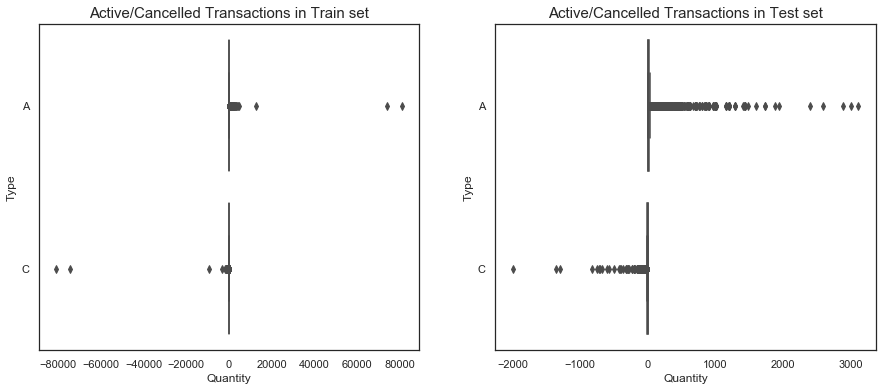

In [339]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(x=df_train['Quantity'],y=df_train['Type'])
plt.title("Active/Cancelled Transactions in Train set",fontsize=15)
plt.subplot(122)
sns.boxplot(x=df_test['Quantity'],y=df_test['Type'])
plt.title("Active/Cancelled Transactions in Test set",fontsize=15)
plt.show()

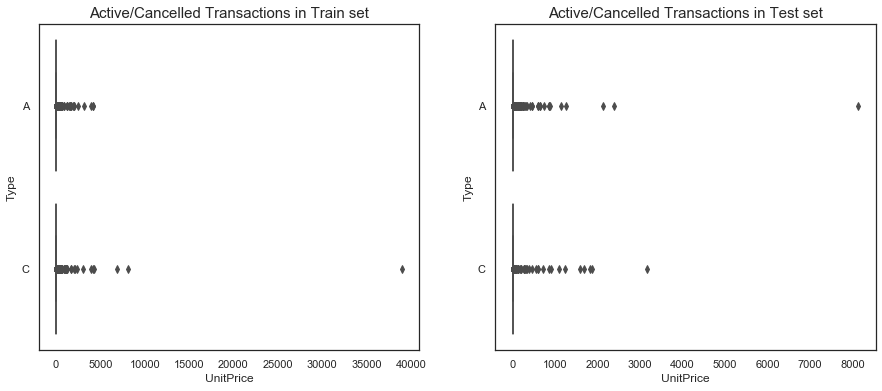

In [340]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(x=df_train['UnitPrice'],y=df_train['Type'])
plt.title("Active/Cancelled Transactions in Train set",fontsize=15)
plt.subplot(122)
sns.boxplot(x=df_test['UnitPrice'],y=df_test['Type'])
plt.title("Active/Cancelled Transactions in Test set",fontsize=15)
plt.show()

In [341]:
print("Negative unitprice transactions count in train is :-",df_train[df_train['UnitPrice']<0]['InvoiceNo'].count())
print("Negative unitprice transactions count in test is :-",df_test[df_test['UnitPrice']<0]['InvoiceNo'].count())

Negative unitprice transactions count in train is :- 0
Negative unitprice transactions count in test is :- 0


In [343]:
corr=df_train.corr()
corr

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.000929,-0.002909
UnitPrice,-0.000929,1.000000,-0.004429
CustomerID,-0.002909,-0.004429,1.000000


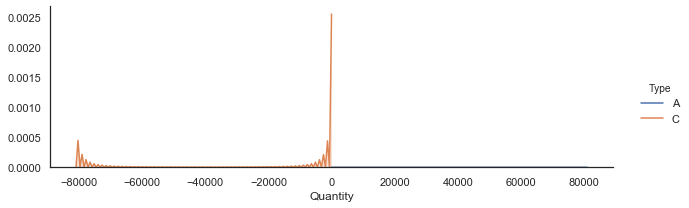

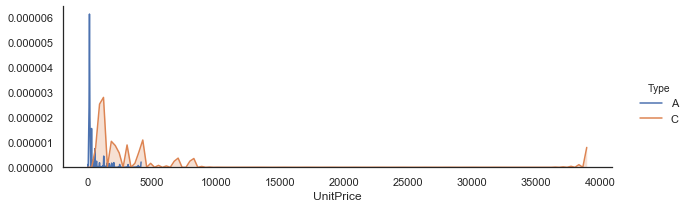

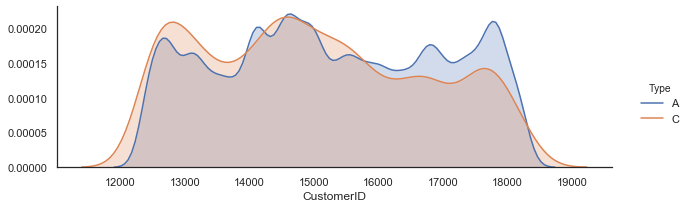

In [344]:
for i in range(len(numeric_cols)):
    sns.FacetGrid(df_train,hue="Type",aspect=3,margin_titles=True).map(sns.kdeplot,numeric_cols[i],shade= True).add_legend()

1. Negative quantity is recorded for cancelled transactions
2. Active and cancelled transactions are done across the customerIds

### Time Series analysis

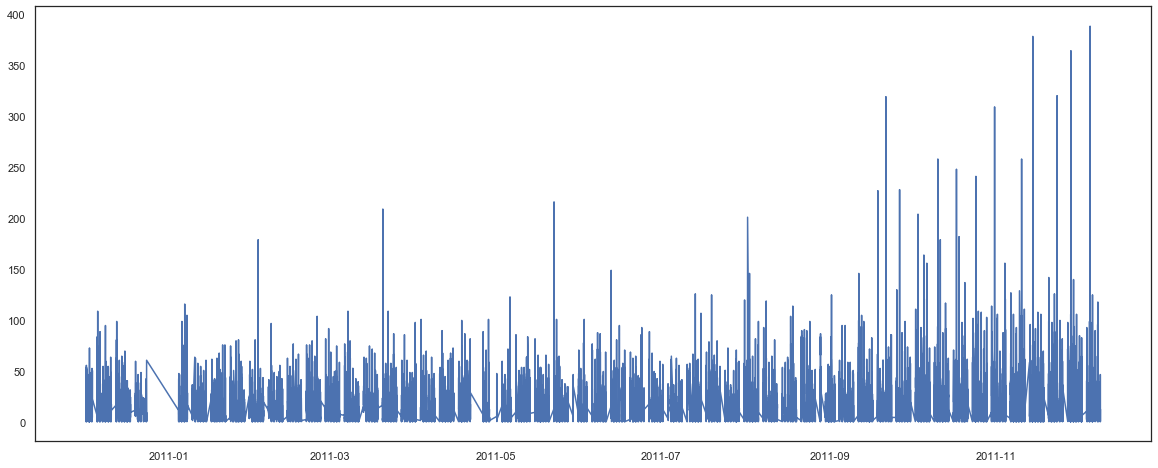

In [345]:
active_transactions=df_train.groupby('InvoiceDate')['InvoiceNo'].agg(np.size)
plt.figure(figsize=(20,8))
plt.plot(active_transactions)
plt.show()

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [346]:
ts_log

InvoiceDate
2010-12-01 08:26:00    1.791759
2010-12-01 08:28:00    0.000000
2010-12-01 08:34:00    2.197225
2010-12-01 08:35:00    0.000000
2010-12-01 08:45:00    2.639057
                         ...   
2011-12-09 12:21:00    0.000000
2011-12-09 12:23:00    0.000000
2011-12-09 12:31:00    2.639057
2011-12-09 12:49:00    1.098612
2011-12-09 12:50:00    2.564949
Name: InvoiceNo, Length: 21712, dtype: float64

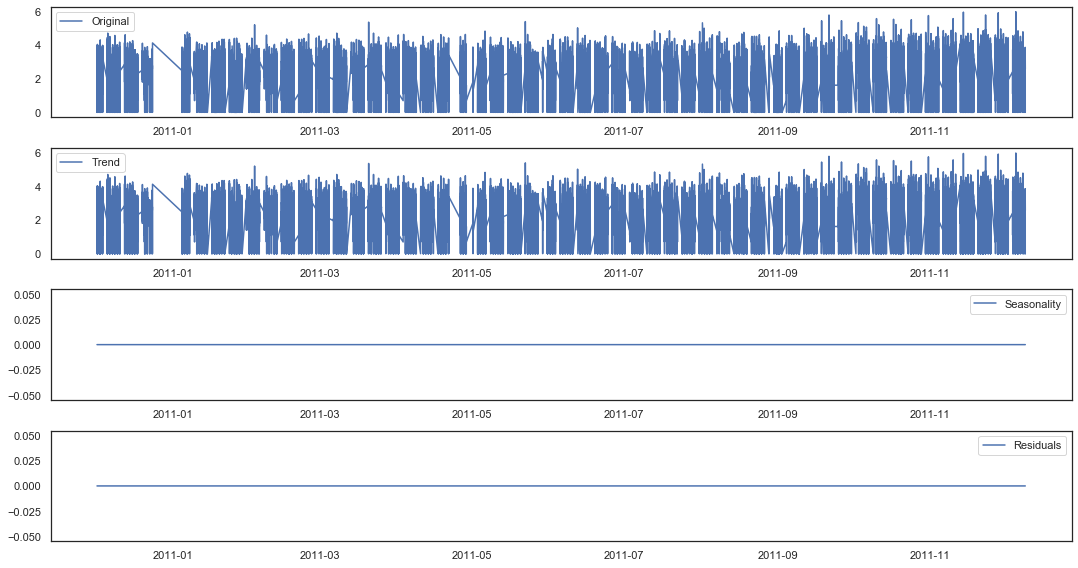

In [347]:
ts_log=np.log(active_transactions)
decomposition=seasonal_decompose(ts_log,freq=1)

trend=decomposition.trend
seasonal=decomposition.seasonal
resid=decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



Clearly there is no sesonality in the transactions, only trend noticed, while doing time series analysis

### Data Transformation:

### Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

In [189]:
#Create month cohorts and analyze active customers for each cohort.

In [348]:
df_train['CustomerID']=df_train['CustomerID'].apply(lambda x: int(x))
df_test['CustomerID']=df_test['CustomerID'].apply(lambda x: int(x))

In [349]:
df_train['InvoiceDate'].nunique()

19427

In [350]:
df_train['InvoiceDate'].dt.year.unique()  # List of years

array([2011, 2010], dtype=int64)

In [351]:
df_train['InvoiceDate'].dt.month.unique()  # List of months 

array([ 6,  5,  1, 12,  9, 10,  2, 11,  7,  8,  3,  4], dtype=int64)

In [352]:
df_train['InvoiceMonth']=df_train['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df_test['InvoiceMonth']=df_test['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

In [353]:
df_train.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,InvoiceMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,A,2011-06
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,A,2011-05
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,A,2011-01


In [354]:
df_test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,InvoiceMonth
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365,United Kingdom,A,2011-03
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429,United Kingdom,A,2011-09
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924,United Kingdom,C,2011-10


In [356]:
df_train['InvoiceMonth'].unique()

array(['2011-06', '2011-05', '2011-01', '2010-12', '2011-09', '2011-10',
       '2011-02', '2011-11', '2011-07', '2011-08', '2011-03', '2011-04',
       '2011-12'], dtype=object)

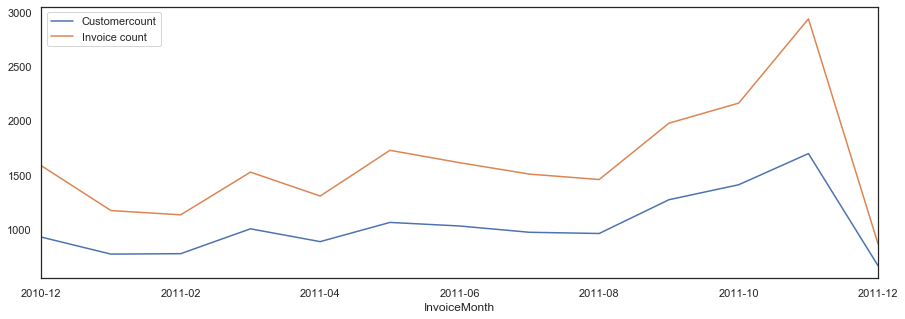

In [365]:
# Plotting the customercount and invoicecount across various invoice months
count_chart=df_train.groupby('InvoiceMonth').agg({'CustomerID':pd.Series.nunique,
                                        'InvoiceNo':pd.Series.nunique
                                         })
count_chart.columns=['Customercount','Invoice count']
count_chart.plot(figsize=(15,5))
plt.legend()
plt.show()

The plot looks promising, since the count of customers and transactions keeps increasing, over the months.
But need to check further how many users keeps on purchasing ,or the user retention. We can use cohort analysis to find this

### Analyze the retention rate of customers using cohort Analysis

In [361]:
# Cohortmonth is from the time the user first starts purchasing from the online site
df_train['CohortMonth']=df_train.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_test['CohortMonth']=df_test.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [362]:
df_train.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,A,2011-06,2011-02
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,A,2011-05,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,A,2011-01,2010-12


In [364]:
df_train[df_train['CustomerID']==16126][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,A,2011-06,2011-02
777,564752,23298,SPOTTY BUNTING,21,2011-08-30 10:07:00,4.95,16126,United Kingdom,A,2011-08,2011-02
1532,564752,20971,PINK BLUE FELT CRAFT TRINKET BOX,36,2011-08-30 10:07:00,1.25,16126,United Kingdom,A,2011-08,2011-02
12973,575687,22273,FELTCRAFT DOLL MOLLY,18,2011-11-10 16:03:00,2.95,16126,United Kingdom,A,2011-11,2011-02
23865,575687,22065,CHRISTMAS PUDDING TRINKET POT,48,2011-11-10 16:03:00,0.39,16126,United Kingdom,A,2011-11,2011-02


The customer, 16126, started becoming active on the site from 2011-02

In [293]:
#df_test.drop('Cohort_group',axis=1,inplace=True)
df_test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,Invoice_Month,Cohort_Month
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,17841,United Kingdom,A,2011-08,2010-12
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365,United Kingdom,A,2011-03,2011-01
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429,United Kingdom,A,2011-09,2011-09


A cohort index is created for each row. The cohort index is the month difference between invoice month and cohort month for each row. By doing the deduction, I am able to know the month lapse between that specific transaction and the first transaction that user made on the website. This helps to check the user retention

In [369]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

df_train['InvoiceMonth']=pd.to_datetime(df_train['InvoiceMonth'])
df_train['CohortMonth']=pd.to_datetime(df_train['CohortMonth'])
df_test['InvoiceMonth']=pd.to_datetime(df_test['InvoiceMonth'])
df_test['CohortMonth']=pd.to_datetime(df_test['CohortMonth'])

invoice_year, invoice_month = get_date(df_train, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(df_train, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
df_train['CohortIndex'] = year_diff * 12 + month_diff 


invoice_year, invoice_month = get_date(df_test, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(df_test, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
df_test['CohortIndex'] = year_diff * 12 + month_diff 

In [371]:
df_train[df_train['CustomerID']==16126][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Type,InvoiceMonth,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,A,2011-06-01,2011-02-01,4
777,564752,23298,SPOTTY BUNTING,21,2011-08-30 10:07:00,4.95,16126,United Kingdom,A,2011-08-01,2011-02-01,6
1532,564752,20971,PINK BLUE FELT CRAFT TRINKET BOX,36,2011-08-30 10:07:00,1.25,16126,United Kingdom,A,2011-08-01,2011-02-01,6
12973,575687,22273,FELTCRAFT DOLL MOLLY,18,2011-11-10 16:03:00,2.95,16126,United Kingdom,A,2011-11-01,2011-02-01,9
23865,575687,22065,CHRISTMAS PUDDING TRINKET POT,48,2011-11-10 16:03:00,0.39,16126,United Kingdom,A,2011-11-01,2011-02-01,9


In [372]:
cohort_data = df_train.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


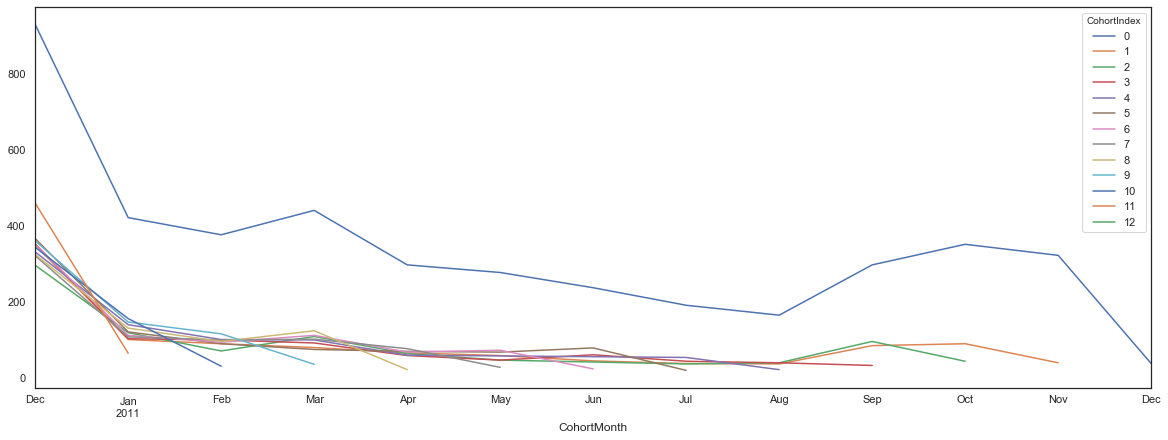

In [401]:
cohort_count.plot(figsize = (20,7))
plt.show()

1. The 13th column and 2010–12–01 row means 248 users out of 929 users were still buying things after the 13 months from 2010/12/1.
2. The user retention rate is quite low, since the no of active customers, who keeps on purchasing is reducing.
3. Need to investigate further to find the reason
4. The findings can be plotted using a heatmap

In [380]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,37.7,32.0,38.0,35.7,39.5,37.8,34.7,35.0,38.9,37.0,49.5,26.7
2011-01-01,100.0,24.2,28.4,24.6,33.4,28.9,26.8,25.8,31.3,35.1,37.2,15.6,NaN
2011-02-01,100.0,24.1,19.1,26.8,27.1,24.1,25.2,26.8,25.7,31.0,8.5,NaN,NaN
2011-03-01,100.0,18.4,24.9,21.1,22.9,17.2,25.6,23.4,28.3,8.4,NaN,NaN,NaN
2011-04-01,100.0,22.5,21.8,20.1,20.5,23.8,23.2,26.2,7.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,21.6,17.3,17.3,21.2,24.8,26.6,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,19.3,18.1,26.1,23.9,33.6,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.3,19.8,23.4,28.6,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.9,24.7,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


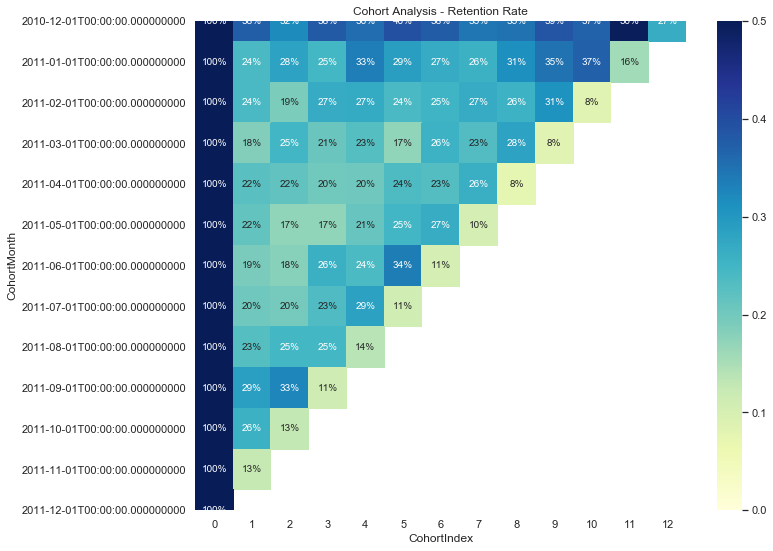

In [381]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

1. From the graph , it can be concluded that the user retention  drops quite heavily, even from the second month
2. 37% is the highest retention rate 
3. Retenion rate is high for users acquired in 2011-01 and 2010-12

### Analyze the average quantity purchased  using cohort Analysis


In [387]:
cohort_data2=df_train.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
cohort_data2

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,0,10.718009
1,2010-12-01,1,14.232635
2,2010-12-01,2,14.744875
3,2010-12-01,3,14.212482
4,2010-12-01,4,13.213349
...,...,...,...
86,2011-10-01,1,6.911776
87,2011-10-01,2,8.508744
88,2011-11-01,0,9.312029
89,2011-11-01,1,9.449294


In [390]:
#pivoting the table
average_qty=cohort_data2.pivot_table(index="CohortMonth",
                        columns="CohortIndex",
                        values="Quantity").round(1)
average_qty

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,10.7,14.2,14.7,14.2,13.2,14.0,14.5,14.5,16.1,15.7,16.8,12.5,14.5
2011-01-01,10.8,14.3,15.0,10.1,13.1,18.3,15.2,15.8,13.5,11.2,9.6,13.7,NaN
2011-02-01,10.9,11.5,19.5,12.0,10.8,12.2,13.3,12.1,11.1,12.1,14.7,NaN,NaN
2011-03-01,9.5,10.3,12.0,9.2,13.5,11.3,13.5,13.4,9.7,7.5,NaN,NaN,NaN
2011-04-01,9.7,10.1,10.0,11.1,11.1,8.0,10.0,9.4,7.1,NaN,NaN,NaN,NaN
2011-05-01,12.0,9.1,12.7,15.3,11.2,8.5,10.5,7.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,12.3,10.7,13.5,10.0,9.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.2,8.4,9.9,7.1,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.3,5.5,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


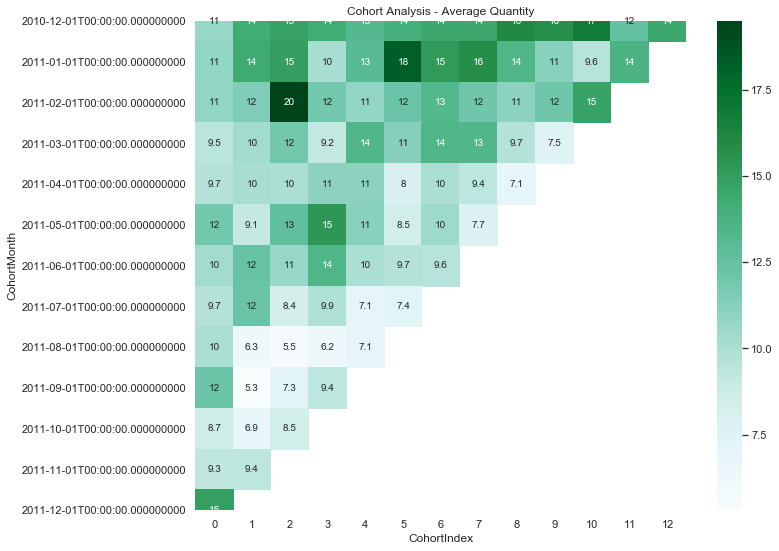

In [392]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_qty, 
            annot = True, 
            cmap = "BuGn")
plt.show()

### Data Modeling using RFM :

### Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
2. Calculate RFM metrics.

Behavioral segmentation by 3 important features:
1. Recency — number of days since the last purchase
2. Frequency — number of transactions made over a given period
3. Monetary — amount spent over a given period of time

In [413]:
# calculate sales price for users
df_train['Salesprice']=df_train['Quantity']*df_train['UnitPrice']
df_test['Salesprice']=df_test['Quantity']*df_test['UnitPrice']


In [408]:
# To calculate R,F and M the following columns are needed
df_train[['InvoiceNo','InvoiceDate','CustomerID','Salesprice']].head(3)

,InvoiceNo,InvoiceDate,CustomerID,Salesprice
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85


In [411]:
# Setting an date value from which RECENCY can be calculated
from datetime import timedelta
NOW = df_train['InvoiceDate'].max() + timedelta(days=1)
NOW

Timestamp('2011-12-10 12:50:00')

In [422]:
rfm= df_train.groupby('CustomerID').agg({
                                         'InvoiceDate' : lambda x: (NOW-x.max()).days,
                                          'InvoiceNo'  : lambda x: len(x),
                                          'Salesprice' : lambda x : sum(x)
                                       })
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Salesprice': 'MonetaryValue'}, inplace=True)

rfm.head(5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,132,3124.96
12348,75,20,1009.88
12349,19,50,1344.17
12350,310,11,213.30


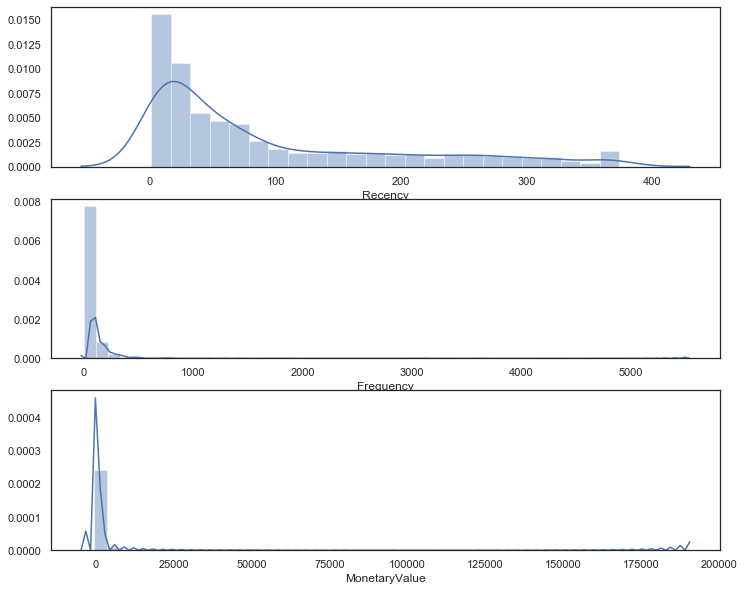

In [423]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

### Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

1.  Combine three ratings to get a RFM segment (as strings).
2.  Get the RFM score by adding up the three ratings.
3.  Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [424]:
# We can use qcut function to create quartiles

In [433]:
# --Calculate R F, M groups--
# Create labels for R, F, M
r_labels = range(4,0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

In [434]:
r_groups[:5]

CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Recency, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [435]:
# Create new columns R and F 
rfm = rfm.assign(R = r_groups.values, F = f_groups.values, M=m_groups.values)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,132,3124.96,4,4,4
12348,75,20,1009.88,2,2,3
12349,19,50,1344.17,3,3,4
12350,310,11,213.30,1,1,2


In [438]:
#Combine three ratings to get a RFM segment (as strings).
rfm['RFM_segment'] = rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])), axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346,326,2,0.00,1,1,1,111
12347,2,132,3124.96,4,4,4,444
12348,75,20,1009.88,2,2,3,223
12349,19,50,1344.17,3,3,4,334
12350,310,11,213.30,1,1,2,112


In [449]:
#Get the RFM score by adding up the three ratings.
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM_Score']=rfm['RFM_Score'].apply(lambda x : int(x))
rfm.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,111,3
12347,2,132,3124.96,4,4,4,444,12
12348,75,20,1009.88,2,2,3,223,7


In [440]:
#Analyze the RFM segments by summarizing them and comment on the findings.
rfm['RFM_segment'].nunique()

61

In [471]:
# Who are the top customers with RFM segment as 444
rfm[rfm['RFM_segment']=='444'].head(5)


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347,2,132,3124.96,4,4,4,444,12,Can't Loose Them
12359,8,181,4681.17,4,4,4,444,12,Can't Loose Them
12362,3,183,3463.01,4,4,4,444,12,Can't Loose Them
12388,16,78,2235.13,4,4,4,444,12,Can't Loose Them
12395,16,113,2189.10,4,4,4,444,12,Can't Loose Them


In [450]:
rfm['RFM_Score'].unique()

array([ 3, 12,  7, 10,  4, 11,  6,  8,  9,  5], dtype=int64)

In [451]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,2,0.00,1,1,1,111,3,Require Activation
12347,2,132,3124.96,4,4,4,444,12,Can't Loose Them
12348,75,20,1009.88,2,2,3,223,7,Loyal
12349,19,50,1344.17,3,3,4,334,10,Can't Loose Them
12350,310,11,213.30,1,1,2,112,4,Needs Attention


In [452]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.6     136.6        2901.9  1668
Champions             61.5      39.8         670.5   496
Loyal                 80.6      27.9         505.9   434
Needs Attention      180.3       9.9         156.7   399
Potential            100.0      20.1         368.7   458
Promising            145.3      14.5         233.4   505
Require Activation   264.9       5.6          74.0   393


In [519]:
rfm.to_excel("rfmtrain.xlsx")

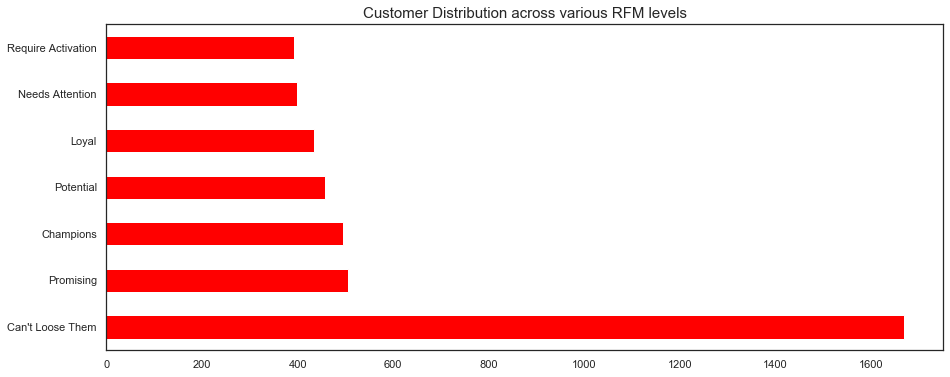

In [464]:
rfm['RFM_Level'].value_counts().plot(kind='barh',figsize=(15,6), color='red')
plt.title('Customer Distribution across various RFM levels',fontsize=15)
plt.show()

1. we can see that a large percentage (~60%) of our customers are in the top tier RFM levels.
2. The rest of the customers are not loyal, and needs some kind of marketing strategy to bring them back

### Data Modeling using Clustering:

#### Create clusters using k-means clustering algorithm in Retail dataset.Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [481]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [482]:
feature_cols=['CustomerID','Salesprice']
x_train=df_train[feature_cols]

In [483]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)

#### Decide the optimum number of clusters to be formed.

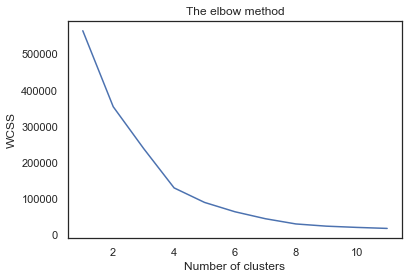

In [484]:
# within-cluster sum of squares (WCSS)
wcss = []

for i in range(1, 12):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_train_scaled)
    
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [487]:
#optimum no of clusters is 4, where you can see an elbow in the plot

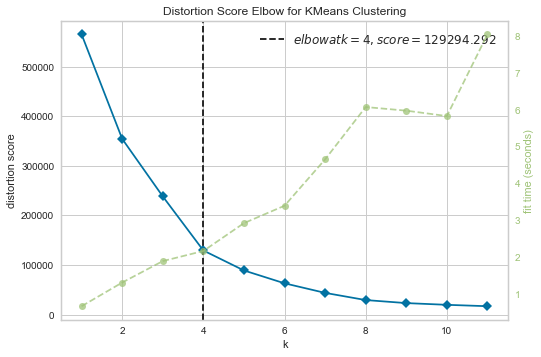

In [490]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 12))
visualizer.fit(x_train_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### Predicting the clusters using the test dataset

In [491]:
x_test=df_test[feature_cols]
x_test_scaled=sc.fit_transform(x_test)

In [493]:
kmeans = KMeans(n_clusters = 4,  # optimum cluster
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)

y_pred=kmeans.fit_predict(x_test_scaled)

In [499]:
df_test['Cluster'] =y_pred

In [521]:
y_pred_train=kmeans.fit_predict(x_train_scaled)
df_train['Cluster'] =y_pred_train
df_train.to_excel("trainwithcluster.xlsx")

#### Analyze these clusters and comment on the results.

In [502]:
df_test['Cluster'].unique()

array([1, 2, 0, 3], dtype=int64)

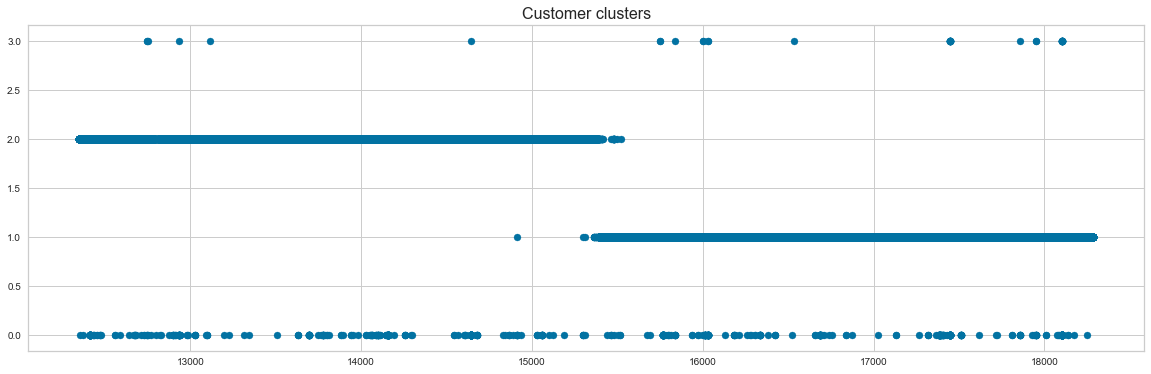

In [554]:
plt.figure(figsize=(20, 6))
plt.scatter(x=df_test['CustomerID'],y=df_test['Cluster'])
plt.title("Customer clusters",fontsize=16)
plt.show()

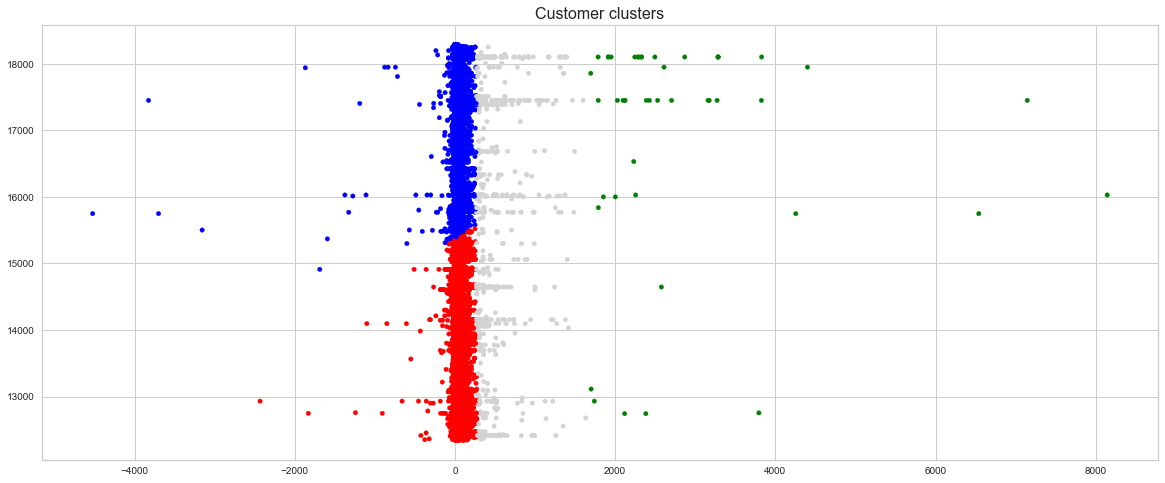

In [518]:
colormap = np.array(['lightgray', 'blue', 'red','green'])

plt.figure(figsize=(20, 8))
plt.scatter(x=df_test['Salesprice'],y=df_test['CustomerID'],c=colormap[kmeans.labels_], s=20)
plt.title("Customer clusters",fontsize=16)
plt.show()

### Applying K-Means Clustering on RFM Variables

In [555]:
rfm.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,2,0.00,1,1,1,111,3,Require Activation
12347,2,132,3124.96,4,4,4,444,12,Can't Loose Them
12348,75,20,1009.88,2,2,3,223,7,Loyal


In [523]:
rfm.corr()

,Recency,Frequency,MonetaryValue,RFM_Score
Recency,1.000000,-0.208125,-0.136087,-0.699481
Frequency,-0.208125,1.000000,0.461855,0.396501
MonetaryValue,-0.136087,0.461855,1.000000,0.258208
RFM_Score,-0.699481,0.396501,0.258208,1.000000


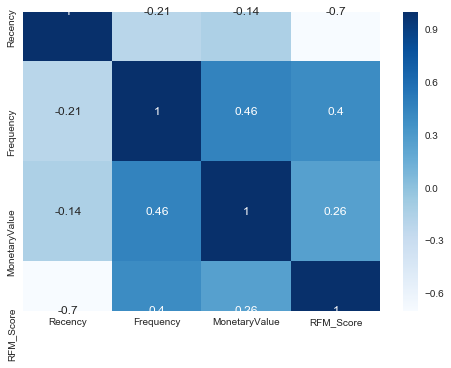

In [526]:
sns.heatmap(rfm.corr(),cmap="Blues",annot=True)

Looking at this heatmap, we see that there is a negative correlation between Recency : Frequency and Recency : Monetary, but there is a positive correlation between Frequency : Monetary

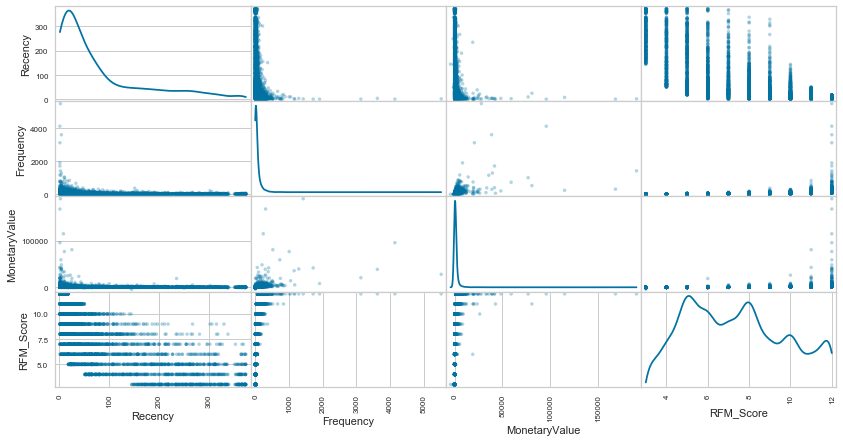

In [532]:
from pandas.plotting import scatter_matrix
scatter_matrix(rfm, alpha = 0.3, figsize = (14,7), diagonal = 'kde')
plt.show()

Notice that there is a skewed distribution for the 3 variables and there are outliers. 

Since clustering algorithms require a normal distribution, normalization of the data is required.

In [538]:
#Data Normalization
r_log=np.log(rfm['Recency'] +0.1)
f_log=np.log(rfm['Frequency'])
m_log=np.log(rfm['MonetaryValue'] +0.1)
log_data = pd.DataFrame({'Monetary': m_log, 'Recency': r_log, 'Frequency': f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346,-2.302585,5.787204,0.693147
12347,8.047209,0.741937,4.882802
12348,6.917686,4.318821,2.995732
12349,7.203606,2.949688,3.912023
12350,5.363168,5.736895,2.397895


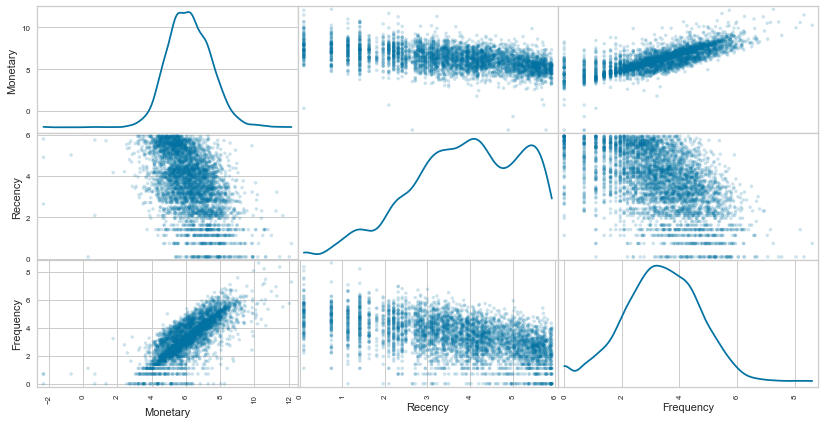

In [539]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')
plt.show()

In [543]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.479671,0.766697
Recency,-0.479671,1.000000,-0.500668
Frequency,0.766697,-0.500668,1.000000


In [546]:
log_data.dropna(subset=['Monetary'],inplace=True)

The distributions of Monetary and Frequency are more normailized, but recency is skewed to the right

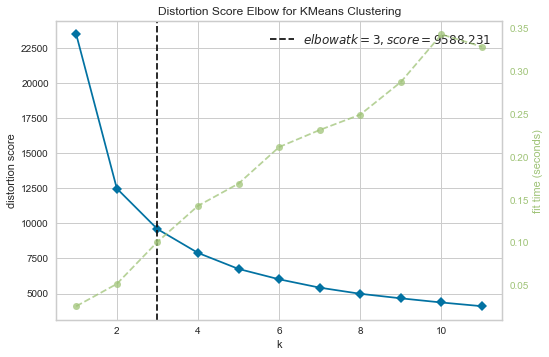

In [547]:
# To find optimum no of clusters for rfm data
log_matrix=log_data.as_matrix()
visualizer = KElbowVisualizer(kmeans, k=(1, 12))
visualizer.fit(log_matrix)    # Fit the data to the visualizer
visualizer.poof()

In [548]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(log_matrix)
clusters_customers = kmeans.predict(log_matrix)

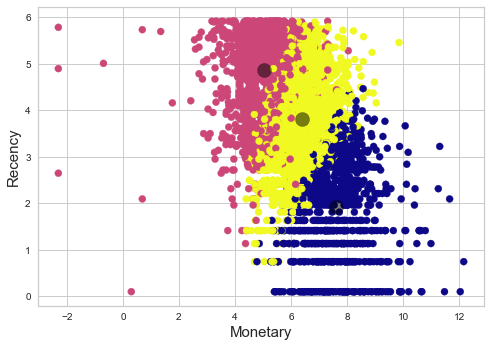

In [553]:
#create a scatter plot
plt.scatter(log_matrix[:, 0], log_matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Monetary', fontsize=15)
plt.ylabel('Recency', fontsize=15)
plt.show()

In [552]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,2,1,0
Number Customers,1809,1502,993


### Conclusion

Although we didn't obtain clearly separated clusters, we were able to build a model that can classify new customers into "low value" , "middle value" and "high value" groups. The clusters assignments are muddled, which may be due to outliers that weren't removed.

Limitations of k-means clustering:
1. Better to deal with spherical clusters, As shown in plots, our customer clusters are not globular
2. Not good with low dimensional datasets
3. If outliers are present, cluster cneters will be skewed, and may not form correctly
